In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
METRICS_ORDER = ["kl", "hd", "jsd", "acc", "ace", "spa", "mse"]

METRIC_NAMES = {
    "kl": "KL",
    "hd": "HD",
    "jsd": "JSD",
    "acc": "Acc.",
    "ace": "ACE",
    "spa": "SPA",
    "mse": "MSE",
}

In [3]:
import pandas as pd
import numpy as np

summary = pd.read_csv("../../analysis/synthetic/results/summary_mean_std.csv", header=[0, 1])

# MultiIndex を flatten
summary.columns = [
    c[0] if c[1] == '' or c[1].startswith('Unnamed') else f"{c[0]}_{c[1]}"
    for c in summary.columns
]


In [4]:
LOWER_IS_BETTER = {"kl", "hd", "jsd", "ace", "mse"}

def format_mean_std(df, metric):
    mean = df[f"{metric}_mean"]
    std = df[f"{metric}_std"]

    if metric in LOWER_IS_BETTER:
        order = mean.argsort()
    else:
        order = (-mean).argsort()

    best, second = order.iloc[0], order.iloc[1]

    out = []
    for i in range(len(df)):
        s = f"{mean.iloc[i]:.2f} ± {std.iloc[i]:.2f}"
        if i == best:
            s = f"\\textbf{{{s}}}"
        elif i == second:
            s = f"\\underline{{{s}}}"
        out.append(s)
    return out


In [5]:
table1 = pd.DataFrame()
table1["Method"] = summary["method"]

for m in METRICS_ORDER:
    table1[METRIC_NAMES[m]] = format_mean_std(summary, m)

table1


,Method,KL,HD,JSD,Acc.,ACE,SPA,MSE
0,full_information,\textbf{2.68 ± 2.58},\textbf{2.26 ± 1.61},\textbf{0.68 ± 0.66},\textbf{0.85 ± 0.09},\textbf{0.35 ± 0.23},\textbf{0.84 ± 0.07},\textbf{0.05 ± 0.03}
1,popularity,4.97 ± 8.18,2.59 ± 1.80,0.89 ± 0.83,\underline{0.84 ± 0.10},0.45 ± 0.43,0.82 ± 0.07,0.06 ± 0.03
2,proposed,\underline{2.84 ± 2.64},\underline{2.31 ± 1.63},\underline{0.72 ± 0.68},0.84 ± 0.10,\underline{0.36 ± 0.24},\underline{0.83 ± 0.08},\underline{0.05 ± 0.03}
3,random,5.55 ± 4.77,3.18 ± 2.07,1.30 ± 1.10,0.72 ± 0.15,0.45 ± 0.30,0.78 ± 0.09,0.07 ± 0.04
4,simple_markov,30.75 ± 20.18,3.31 ± 2.06,1.32 ± 0.98,0.78 ± 0.13,1.34 ± 0.97,0.81 ± 0.09,0.07 ± 0.04


In [6]:
print(table1.to_latex(escape=False, index=False))

\begin{tabular}{llllllll}
\toprule
Method & KL & HD & JSD & Acc. & ACE & SPA & MSE \\
\midrule
full_information & \textbf{2.68 ± 2.58} & \textbf{2.26 ± 1.61} & \textbf{0.68 ± 0.66} & \textbf{0.85 ± 0.09} & \textbf{0.35 ± 0.23} & \textbf{0.84 ± 0.07} & \textbf{0.05 ± 0.03} \\
popularity & 4.97 ± 8.18 & 2.59 ± 1.80 & 0.89 ± 0.83 & \underline{0.84 ± 0.10} & 0.45 ± 0.43 & 0.82 ± 0.07 & 0.06 ± 0.03 \\
proposed & \underline{2.84 ± 2.64} & \underline{2.31 ± 1.63} & \underline{0.72 ± 0.68} & 0.84 ± 0.10 & \underline{0.36 ± 0.24} & \underline{0.83 ± 0.08} & \underline{0.05 ± 0.03} \\
random & 5.55 ± 4.77 & 3.18 ± 2.07 & 1.30 ± 1.10 & 0.72 ± 0.15 & 0.45 ± 0.30 & 0.78 ± 0.09 & 0.07 ± 0.04 \\
simple_markov & 30.75 ± 20.18 & 3.31 ± 2.06 & 1.32 ± 0.98 & 0.78 ± 0.13 & 1.34 ± 0.97 & 0.81 ± 0.09 & 0.07 ± 0.04 \\
\bottomrule
\end{tabular}



In [7]:
ratio = pd.read_csv("../../analysis/synthetic/results/significant_ratio.csv")

ratio["percent"] = 100 * ratio["significant_ratio"]

In [8]:
BASELINE_ORDER = [
    "full_information",
    "popularity",
    "random",
    "simple_markov",
]

table2 = pd.DataFrame()
table2["vs. Method"] = [f"vs. {b}" for b in BASELINE_ORDER]

for m in METRICS_ORDER:
    vals = []
    for b in BASELINE_ORDER:
        v = ratio[
            (ratio["metric"] == m) &
            (ratio["baseline"] == b)
        ]["percent"].values

        vals.append(f"{v[0]:.1f}" if len(v) > 0 else "-")

    table2[METRIC_NAMES[m]] = vals

table2

,vs. Method,KL,HD,JSD,Acc.,ACE,SPA,MSE
0,vs. full_information,11.2,12.0,12.4,0.8,1.2,2.5,1.2
1,vs. popularity,67.4,70.7,67.4,0.4,40.1,61.6,31.8
2,vs. random,99.6,99.6,100.0,99.2,86.8,99.6,86.8
3,vs. simple_markov,100.0,86.4,81.4,75.2,98.3,51.7,93.8


In [9]:
print(table2.to_latex(index=False))

\begin{tabular}{llllllll}
\toprule
vs. Method & KL & HD & JSD & Acc. & ACE & SPA & MSE \\
\midrule
vs. full_information & 11.2 & 12.0 & 12.4 & 0.8 & 1.2 & 2.5 & 1.2 \\
vs. popularity & 67.4 & 70.7 & 67.4 & 0.4 & 40.1 & 61.6 & 31.8 \\
vs. random & 99.6 & 99.6 & 100.0 & 99.2 & 86.8 & 99.6 & 86.8 \\
vs. simple_markov & 100.0 & 86.4 & 81.4 & 75.2 & 98.3 & 51.7 & 93.8 \\
\bottomrule
\end{tabular}



In [10]:
def plot_significant_ratio(ratio, metric):
    df = ratio[ratio["metric"] == metric]
    pivot = df.pivot(
        index="baseline",
        columns="metric",
        values="significant_ratio"
    )

    plt.figure(figsize=(4, 4))
    sns.heatmap(
        pivot,
        annot=True,
        cmap="Reds",
        vmin=0,
        vmax=1,
        cbar=True
    )
    plt.title(f"Significant Ratio ({metric})")
    plt.tight_layout()
    plt.show()

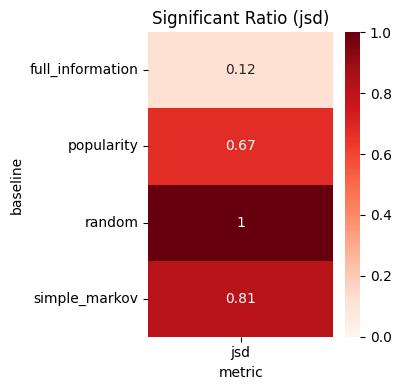

In [11]:
plot_significant_ratio(ratio, "jsd")

In [12]:
import glob
import os

# すべての結果CSVファイルを読み込んで結合
result_files = glob.glob("../outputs/synthetic/results/*.csv")
df_list = []
for file in result_files:
    df = pd.read_csv(file)
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)

ValueError: No objects to concatenate

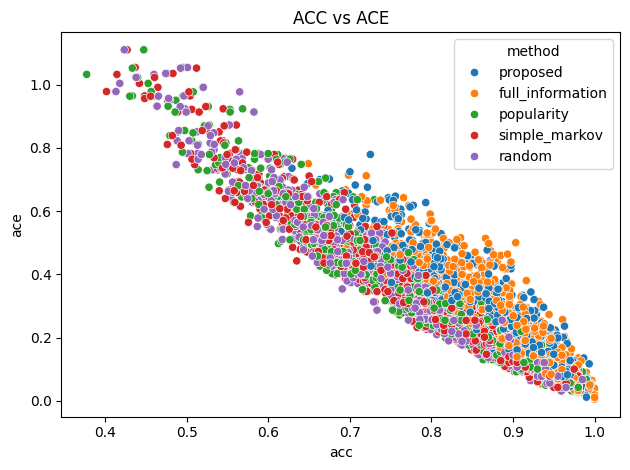

In [ ]:
sns.scatterplot(
    data=df_all,
    x="acc",
    y="ace",
    hue="method"
)
plt.title("ACC vs ACE")
plt.tight_layout()
plt.show()